### Feature Engineering:

Pré-processamento de features do conjunto de dados.

* Verificar registros duplicados.
* Registros faltantes.
* Variáveis temporais.
* Transformação e padronização de valores.
* Encoding de variáveis categóricas.
* Formação e criação de novas features.
* Exclusão de features redundantes.
* Verificação e remoção de multi-colinearidade.

### Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

### Load Dataset:

In [2]:
df = pd.read_csv('zillow.csv')
df.shape

(30295, 60)

In [3]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111,NaN,2.0,2.0,0.0,NaN,NaN,34303597,-119287236,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265,NaN,6.111002e+07,34543.0,2061,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111,NaN,1.0,1.0,0.0,NaN,NaN,34272866,-119198911,NaN,NaN,NaN,NaN,NaN,NaN,1129,266,NaN,6.111002e+07,34543.0,2061,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111,NaN,2.0,2.0,441.0,NaN,NaN,34340801,-119079610,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261,NaN,6.111001e+07,26965.0,2061,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111,1.0,1.0,2.0,460.0,NaN,NaN,34354313,-119076405,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261,NaN,6.111001e+07,26965.0,2061,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111,1.0,2.0,2.0,665.0,NaN,NaN,34266578,-119165392,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261,NaN,6.111001e+07,34543.0,2061,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


### Verificando registros duplicados.

In [4]:
duplicate = df[df.duplicated('parcelid')]
duplicate.shape

(38, 60)

#### Excluindo os registros com id's duplicados.

In [5]:
df.drop_duplicates(subset ="parcelid", keep = 'first', inplace = True)
df.shape

(30257, 60)

###  Verificando Missing Values.

In [6]:
missing_val = [var for var in df.columns if df[var].isnull().sum()>0]
df[missing_val].isnull().sum()

airconditioningtypeid           20565
architecturalstyletypeid        30167
basementsqft                    30243
buildingclasstypeid             30249
buildingqualitytypeid           10998
calculatedbathnbr                 391
decktypeid                      30040
finishedfloor1squarefeet        27997
calculatedfinishedsquarefeet      217
finishedsquarefeet12             1548
finishedsquarefeet13            30246
finishedsquarefeet15            29060
finishedsquarefeet50            27997
finishedsquarefeet6             30134
fireplacecnt                    27033
fullbathcnt                       391
garagecarcnt                    20240
garagetotalsqft                 20240
hashottuborspa                  29495
heatingorsystemtypeid           11429
lotsizesquarefeet                3363
poolcnt                         24241
poolsizesum                     29931
pooltypeid10                    29887
pooltypeid2                     29865
pooltypeid7                     24633
propertyzoni

### Excluindo colunas que tenham mais que 60% de registros missing.

In [7]:
df.shape

(30257, 60)

#### Estabelecendo o limite para filtragem.

In [8]:
limit = df.shape[0] * 0.6
vars_dropped = [var for var in missing_val if df[var].isnull().sum() > limit]

#### Variáveis que serão excluídas.

In [9]:
vars_dropped

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

#### Excluindo as variáveis.

In [11]:
df.drop(columns=vars_dropped, axis=1, inplace=True)

In [12]:
df.shape

(30257, 31)

In [12]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111,2.0,NaN,34303597,-119287236,1735.0,1128,265,NaN,6.111002e+07,34543.0,2061,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111,1.0,NaN,34272866,-119198911,NaN,1129,266,NaN,6.111002e+07,34543.0,2061,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111,2.0,NaN,34340801,-119079610,6569.0,1111,261,NaN,6.111001e+07,26965.0,2061,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015,14234.0,591.64,6.111001e+13,0.0060,2016-05-27
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111,1.0,NaN,34354313,-119076405,7400.0,1110,261,NaN,6.111001e+07,26965.0,2061,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111,2.0,NaN,34266578,-119165392,6326.0,1111,261,NaN,6.111001e+07,34543.0,2061,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08


### Diferença entre o ano que a casa foi construída para o ano que foi vendida.

In [13]:
df['yeardifference'] = df['assessmentyear'] - df['yearbuilt']
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111,2.0,NaN,34303597,-119287236,1735.0,1128,265,NaN,6.111002e+07,34543.0,2061,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111,1.0,NaN,34272866,-119198911,NaN,1129,266,NaN,6.111002e+07,34543.0,2061,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111,2.0,NaN,34340801,-119079610,6569.0,1111,261,NaN,6.111001e+07,26965.0,2061,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015,14234.0,591.64,6.111001e+13,0.0060,2016-05-27,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111,1.0,NaN,34354313,-119076405,7400.0,1110,261,NaN,6.111001e+07,26965.0,2061,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111,2.0,NaN,34266578,-119165392,6326.0,1111,261,NaN,6.111001e+07,34543.0,2061,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08,31.0


#### Excluindo as variáveis desnecessárias.

In [14]:
df.drop(columns=['assessmentyear', 'yearbuilt', 'transactiondate'], axis=1, inplace=True)

### Transformando as variáveis para a sua escala original.

In [15]:
df[['latitude', 'longitude']] = (df[['latitude', 'longitude']])/(10**6)
df['censustractandblock'] = (df['censustractandblock'])/(10**12)
df['rawcensustractandblock'] = (df['rawcensustractandblock'])/(10**6)
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111,2.0,NaN,34.303597,-119.287236,1735.0,1128,265,NaN,61.110022,34543.0,2061,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111,1.0,NaN,34.272866,-119.198911,NaN,1129,266,NaN,61.110015,34543.0,2061,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111,2.0,NaN,34.340801,-119.079610,6569.0,1111,261,NaN,61.110007,26965.0,2061,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111,1.0,NaN,34.354313,-119.076405,7400.0,1110,261,NaN,61.110008,26965.0,2061,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111,2.0,NaN,34.266578,-119.165392,6326.0,1111,261,NaN,61.110014,34543.0,2061,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0


In [16]:
df.shape

(30257, 29)

### Substituindo os valores missing pelo valor da moda.

In [17]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           10998
calculatedbathnbr                 391
calculatedfinishedsquarefeet      217
finishedsquarefeet12             1548
fips                                0
fullbathcnt                       391
heatingorsystemtypeid           11429
latitude                            0
longitude                           0
lotsizesquarefeet                3363
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              10665
rawcensustractandblock              0
regionidcity                      639
regionidcounty                      0
regionidzip                        12
roomcnt                             0
unitcnt                         10656
structuretaxvaluedollarcnt        118
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
taxamount                           1
censustracta

In [17]:
missing_var = [var for var in df.columns if df[var].isnull().sum() > 0]
for var in missing_var:
    df[var] = df[var].fillna(df[var].mode()[0])

In [18]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
yeardifference                  0
dtype: int64

### Realizando o encoding das variáveis categóricas.

In [19]:
cat_vars = [var for var in df.columns if df[var].dtypes=='O']
cat_vars

['propertycountylandusecode', 'propertyzoningdesc']

#### Instanciando o Label Encoder.

In [20]:
encoder = LabelEncoder()

In [21]:
for i in range(len(cat_vars)):
    var = cat_vars[i]
    var_labels = encoder.fit_transform(df[var])
    var_mappings = {index: label for index, label in enumerate(encoder.classes_)}
    df[(var + '_labels')] = var_labels
    df.drop(columns=var, axis=1, inplace=True)

#### Verificando os mapeamos de códigos.

In [22]:
var_mappings

{0: '1NR1*',
 1: '1NR3*',
 2: 'AH RM-CD*',
 3: 'AH RM-CD-F',
 4: 'AH RS-(3)-',
 5: 'AHA11*',
 6: 'AHA110000*',
 7: 'AHR120000*',
 8: 'AHR17000*',
 9: 'AHR17000-C',
 10: 'AHR17500*',
 11: 'AHR26250*',
 12: 'AHR3*',
 13: 'AHR3-R325U',
 14: 'AHR335U*',
 15: 'AHRA20000*',
 16: 'AHRPD10000',
 17: 'AHRPD15000',
 18: 'AHRPD51U*',
 19: 'AHRPD51U-R',
 20: 'AHRPD70005',
 21: 'AHRPD70006',
 22: 'AHRPD75009',
 23: 'AHRS-2-200',
 24: 'ALCBD/DRD*',
 25: 'ALCP',
 26: 'ALCPD*',
 27: 'ALR1*',
 28: 'ALR165',
 29: 'ALR1YY',
 30: 'ALRPD*',
 31: 'ARR015',
 32: 'ARR0YY',
 33: 'ARR1*',
 34: 'ARR110000&',
 35: 'ARR110000*',
 36: 'ARR110000D',
 37: 'ARR11000D*',
 38: 'ARR112500*',
 39: 'ARR175',
 40: 'ARR17500*',
 41: 'ARR1D*',
 42: 'ARR1YY',
 43: 'ARR2*',
 44: 'ARR2YY',
 45: 'ARR3',
 46: 'ARR3*',
 47: 'ARR3HY',
 48: 'ARR3VV',
 49: 'ARR3YY',
 50: 'ARRO*',
 51: 'ARROD*',
 52: 'ATA10000*',
 53: 'ATMR',
 54: 'ATR16000*',
 55: 'AVC1*',
 56: 'AVR1*',
 57: 'AVR2*',
 58: 'AVR3*',
 59: 'AVU*',
 60: 'AZC3*',
 61: 'AZCB

In [23]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111,2.0,2.0,34.303597,-119.287236,1735.0,265,61.110022,34543.0,2061,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0,44,428
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111,1.0,2.0,34.272866,-119.198911,6000.0,266,61.110015,34543.0,2061,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0,45,428
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111,2.0,2.0,34.340801,-119.079610,6569.0,261,61.110007,26965.0,2061,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0,40,428
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111,1.0,2.0,34.354313,-119.076405,7400.0,261,61.110008,26965.0,2061,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0,39,428
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111,2.0,2.0,34.266578,-119.165392,6326.0,261,61.110014,34543.0,2061,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0,40,428


### Verificando Multi-Colinearity:

<AxesSubplot:>

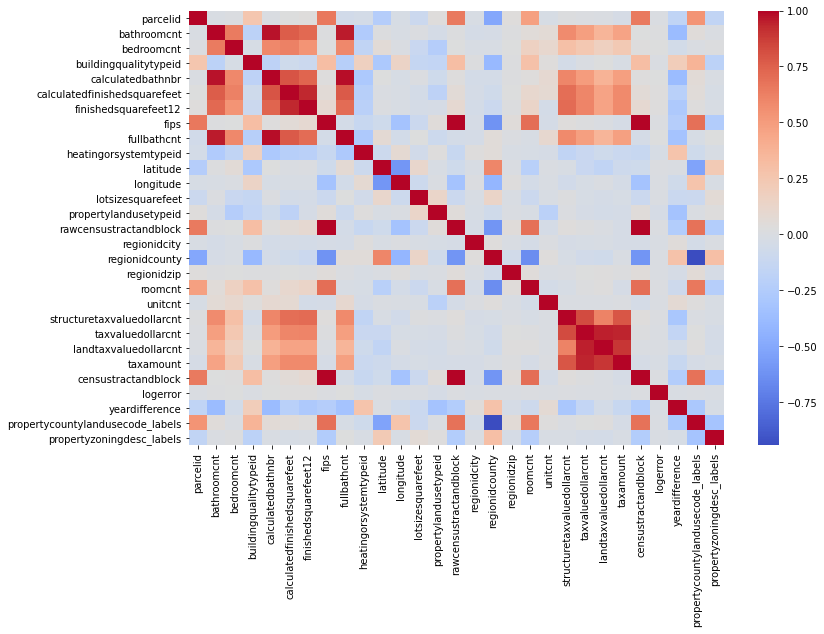

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')

#### Excluindo variáveis com forte correlação.

In [25]:
df.drop(
    columns=[ 
              'calculatedbathnbr'
             ,'calculatedfinishedsquarefeet'
             ,'structuretaxvaluedollarcnt'
             ,'taxvaluedollarcnt'
             ,'landtaxvaluedollarcnt'
             ,'fullbathcnt'
        ]
        ,axis = 1
        ,inplace = True
    )

In [26]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,1264.0,6111,2.0,34.303597,-119.287236,1735.0,265,61.110022,34543.0,2061,97081.0,5.0,1.0,2015.06,61.110022,0.0953,29.0,44,428
1,17088994,1.0,2.0,7.0,777.0,6111,2.0,34.272866,-119.198911,6000.0,266,61.110015,34543.0,2061,97083.0,4.0,1.0,2581.30,61.110015,0.0198,25.0,45,428
2,17100444,2.0,3.0,7.0,1101.0,6111,2.0,34.340801,-119.079610,6569.0,261,61.110007,26965.0,2061,97113.0,5.0,1.0,591.64,61.110007,0.0060,59.0,40,428
3,17102429,1.5,2.0,7.0,1554.0,6111,2.0,34.354313,-119.076405,7400.0,261,61.110008,26965.0,2061,97113.0,5.0,1.0,682.78,61.110008,-0.0566,50.0,39,428
4,17109604,2.5,4.0,7.0,2415.0,6111,2.0,34.266578,-119.165392,6326.0,261,61.110014,34543.0,2061,97084.0,8.0,1.0,5886.92,61.110014,0.0573,31.0,40,428


### Excluindo variáveis desnecessárias.

In [27]:
df.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)
df.shape

(30257, 21)

### Salvando o dataset em disco.

In [29]:
df.to_csv('zillow_dataset_final.csv', index=False)